In [2]:
import numpy as np
import pandas as pd


In [3]:
import os

file_path = '/content/imf-dm-export-20230513.xls'
directory = os.path.dirname(file_path)

for dirname, _, filenames in os.walk(directory):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/content/imf-dm-export-20230513.xls
/content/.config/gce
/content/.config/default_configs.db
/content/.config/.last_opt_in_prompt.yaml
/content/.config/active_config
/content/.config/config_sentinel
/content/.config/.last_update_check.json
/content/.config/.last_survey_prompt.yaml
/content/.config/configurations/config_default
/content/.config/logs/2023.06.30/13.34.14.867054.log
/content/.config/logs/2023.06.30/13.33.42.847153.log
/content/.config/logs/2023.06.30/13.33.50.488582.log
/content/.config/logs/2023.06.30/13.32.54.779320.log
/content/.config/logs/2023.06.30/13.33.19.734254.log
/content/.config/logs/2023.06.30/13.34.15.548826.log
/content/sample_data/anscombe.json
/content/sample_data/README.md
/content/sample_data/mnist_train_small.csv
/content/sample_data/california_housing_test.csv
/content/sample_data/mnist_test.csv
/content/sample_data/california_housing_train.csv


In [4]:
!pip install xlrd


In [5]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings("ignore")
import xlrd


In [6]:
workbook = xlrd.open_workbook('/content/imf-dm-export-20230513.xls', ignore_workbook_corruption=True)
df = pd.read_excel(workbook)
df.head()


,Real GDP growth (Annual percent change),1980,1981,1982,1983,1984,1985,1986,1987,1988,...,2019,2020,2021,2022,2023,2024,2025,2026,2027,2028
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,3.9,-2.4,no data,no data,no data,no data,no data,no data,no data,no data
2,Albania,2.7,5.7,2.9,1.1,2,-1.5,5.6,-0.8,-1.4,...,2.1,-3.5,8.5,3.7,2.2,3.3,3.4,3.4,3.4,3.4
3,Algeria,-5.4,3,6.4,5.4,5.6,5.6,-0.2,-0.7,-1.9,...,1,-5.1,3.4,2.9,2.6,2.6,2.2,2.1,1.7,1.8
4,Andorra,no data,no data,no data,no data,no data,no data,no data,no data,no data,...,2,-11.2,8.9,8.7,1.3,1.5,1.5,1.5,1.5,1.5


In [7]:
df.shape


(231, 50)

In [8]:
df.columns


Index(['Real GDP growth (Annual percent change)',
                                            1980,
                                            1981,
                                            1982,
                                            1983,
                                            1984,
                                            1985,
                                            1986,
                                            1987,
                                            1988,
                                            1989,
                                            1990,
                                            1991,
                                            1992,
                                            1993,
                                            1994,
                                            1995,
                                            1996,
                                            1997,
                                            1998,


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Real GDP growth (Annual percent change)  229 non-null    object
 1   1980                                     228 non-null    object
 2   1981                                     228 non-null    object
 3   1982                                     228 non-null    object
 4   1983                                     228 non-null    object
 5   1984                                     228 non-null    object
 6   1985                                     228 non-null    object
 7   1986                                     228 non-null    object
 8   1987                                     228 non-null    object
 9   1988                                     228 non-null    object
 10  1989                                     228 non-null    objec

In [10]:
df.duplicated().sum()


1

In [11]:
df = df.drop_duplicates()


In [12]:
df.isnull().sum()


Real GDP growth (Annual percent change)    1
1980                                       2
1981                                       2
1982                                       2
1983                                       2
1984                                       2
1985                                       2
1986                                       2
1987                                       2
1988                                       2
1989                                       2
1990                                       2
1991                                       2
1992                                       2
1993                                       2
1994                                       2
1995                                       2
1996                                       2
1997                                       2
1998                                       2
1999                                       2
2000                                       2
2001      

In [13]:
df.dropna(inplace = True)


In [14]:
df.isnull().sum()


Real GDP growth (Annual percent change)    0
1980                                       0
1981                                       0
1982                                       0
1983                                       0
1984                                       0
1985                                       0
1986                                       0
1987                                       0
1988                                       0
1989                                       0
1990                                       0
1991                                       0
1992                                       0
1993                                       0
1994                                       0
1995                                       0
1996                                       0
1997                                       0
1998                                       0
1999                                       0
2000                                       0
2001      

To handle the issues in the dataset, we are removing all the null values and replacing the "no data" entries with zeros. This ensures that our analysis is based on complete information and allows us to maintain consistency throughout the dataset.

In [15]:
# Replacing 'no data' with 0 in DataFrame

df.replace(to_replace='no data', value=0, inplace=True)


In [16]:
df.shape


(228, 50)

In [17]:
# Printing Unique Values in DataFrame Columns
for i in df.columns:
    print(df[i].unique())
    print("*" * 60)


['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas, The' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Brunei Darussalam' 'Bulgaria' 'Burkina Faso'
 'Burundi' 'Cabo Verde' 'Cambodia' 'Cameroon' 'Canada'
 'Central African Republic' 'Chad' 'Chile' "China, People's Republic of"
 'Colombia' 'Comoros' 'Congo, Dem. Rep. of the' 'Congo, Republic of '
 'Costa Rica' 'Croatia' 'Cyprus' 'Czech Republic' "Côte d'Ivoire"
 'Denmark' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador' 'Egypt'
 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia, The' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau'
 'Guyana' 'Haiti' 'Honduras' 'Hong Kong SAR' 'Hungary' 'Iceland' 'India'
 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'I

In [18]:
# Calculating Maximum GDP for Each Country
maximum_GDP = pd.concat([pd.DataFrame(df.iloc[:, 0]), df.max(axis=1)], axis=1)
maximum_GDP.rename(columns={'Real GDP growth (Annual percent change)': 'countries', 0: 'max_GDP'}, inplace=True)
maximum_GDP


,countries,max_GDP
1,Afghanistan,20.6
2,Albania,12.9
3,Algeria,7.2
4,Andorra,8.9
5,Angola,15.0
...,...,...
224,Major advanced economies (G7),5.3
225,Middle East and Central Asia,10.2
226,Other advanced economies,6.6
227,Sub-Saharan Africa,6.9


In [19]:
# Converting Object Data Types to float64
for i in df.columns[1:]:
    df[i] = df[i].astype('float64')


In [20]:
# Converting Object Data Types to float64
for i in df.columns[1:]:
    df[i] = df[i].astype('float64')


In [21]:
# Finding the Maximum GDP for All Countries and Corresponding Year
max_GDP_for_all_countries = pd.concat([maximum_GDP, pd.DataFrame(df.iloc[:, 1:].idxmax(axis=1), columns=['year'])], axis=1)
max_GDP_for_all_countries


,countries,max_GDP,year
1,Afghanistan,20.6,2009
2,Albania,12.9,1999
3,Algeria,7.2,2003
4,Andorra,8.9,2021
5,Angola,15.0,2005
...,...,...,...
224,Major advanced economies (G7),5.3,2021
225,Middle East and Central Asia,10.2,2003
226,Other advanced economies,6.6,1984
227,Sub-Saharan Africa,6.9,2004


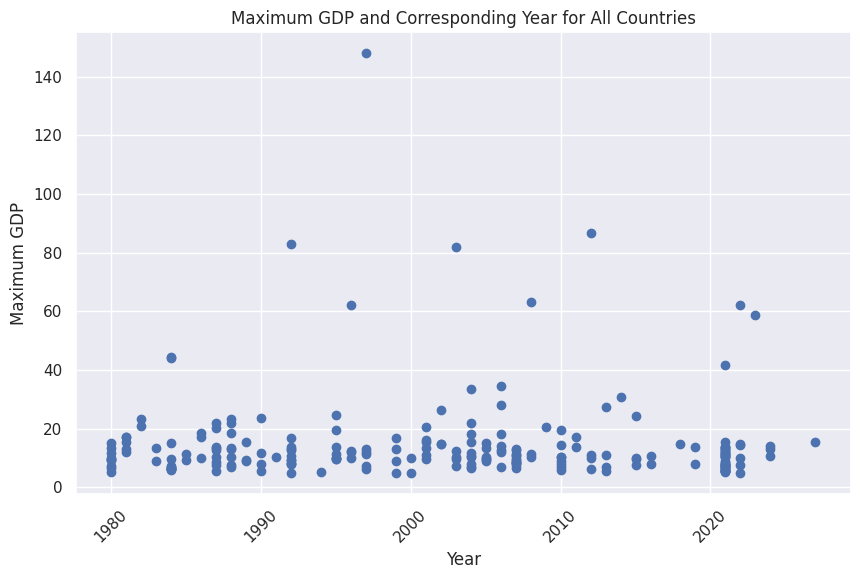

In [25]:
# The same in terms of scatter diagram

import matplotlib.pyplot as plt

# Creating a Scatter Plot to Visualize Maximum GDP and Corresponding Year
plt.figure(figsize=(10, 6))
plt.scatter(max_GDP_for_all_countries['year'], max_GDP_for_all_countries['max_GDP'], marker='o', color='b')
plt.xlabel('Year')
plt.ylabel('Maximum GDP')
plt.title('Maximum GDP and Corresponding Year for All Countries')
plt.xticks(rotation=45)
plt.show()


we utilize a scatter plot to showcase the maximum GDP values and their corresponding years. Each point on the plot represents a country, with the x-axis representing the year and the y-axis representing the maximum GDP achieved.

Representation of the relationship between the maximum GDP values and their corresponding years for each country.


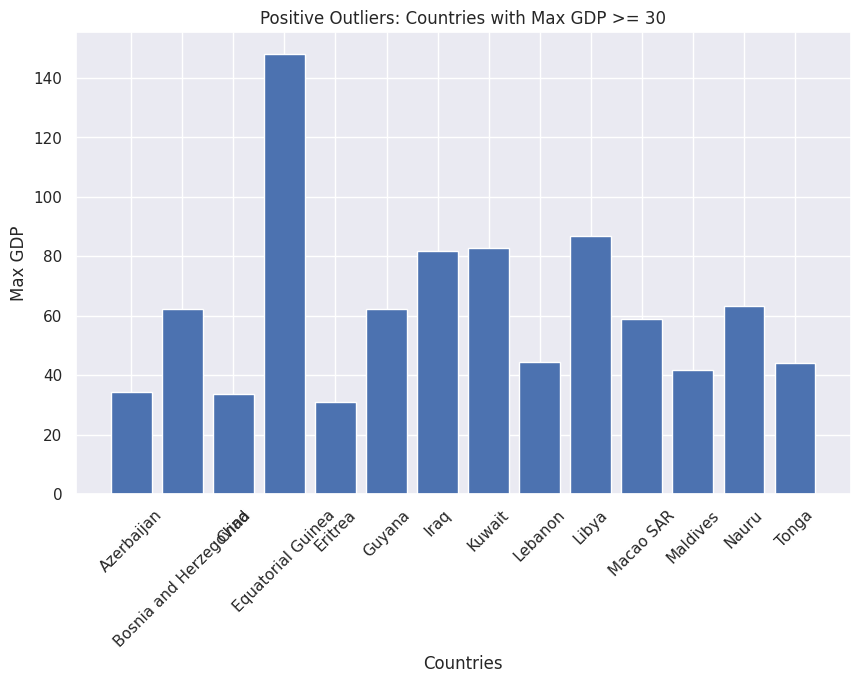

In [26]:
import matplotlib.pyplot as plt

# Filtering and Visualizing Positive Outliers
outliers = max_GDP_for_all_countries[max_GDP_for_all_countries['max_GDP'] >= 30]

plt.figure(figsize=(10, 6))
plt.bar(outliers['countries'], outliers['max_GDP'])
plt.xlabel('Countries')
plt.ylabel('Max GDP')
plt.title('Positive Outliers: Countries with Max GDP >= 30')
plt.xticks(rotation=45)
plt.show()

In [27]:
# Finding the Minimum GDP for All Countries and Corresponding Year
minimum_GDP = pd.concat([pd.DataFrame(df.iloc[:, 0]), df.min(axis=1)], axis=1)
minimum_GDP.rename(columns={'Real GDP growth (Annual percent change)': 'countries', 0: 'min_GDP'}, inplace=True)
min_GDP_for_all_countries = pd.concat([minimum_GDP, pd.DataFrame(df.iloc[:, 1:].idxmin(axis=1), columns=['year'])], axis=1)
min_GDP_for_all_countries


,countries,min_GDP,year
1,Afghanistan,-2.4,2020
2,Albania,-28.0,1991
3,Algeria,-5.4,1980
4,Andorra,-11.2,2020
5,Angola,-5.6,2020
...,...,...,...
224,Major advanced economies (G7),-4.5,2020
225,Middle East and Central Asia,-2.7,2020
226,Other advanced economies,-1.6,2020
227,Sub-Saharan Africa,-1.7,2020


# When Population Outpaces GDP: The Impact on GDP per Capita Growth




In [31]:
# Countries Plunging into GDP Decline
declining_countries = min_GDP_for_all_countries[min_GDP_for_all_countries['min_GDP'] <= -10]
declining_countries


,countries,min_GDP,year
2,Albania,-28.0,1991
4,Andorra,-11.2,2020
6,Antigua and Barbuda,-20.2,2020
7,Argentina,-10.9,2002
8,Armenia,-14.1,1993
...,...,...,...
193,West Bank and Gaza,-12.5,2002
194,Yemen,-28.0,2015
195,Zambia,-13.3,1994
196,Zimbabwe,-16.3,2008


# Unveiling India's Economic Pulse: Exploring the Average GDP

In [33]:
# Exploring India's Average GDP
average_GDP_India = df[df.iloc[:, 0] == 'India'].iloc[:, 1:].mean(axis=1)
average_GDP_India


78    6.091837
dtype: float64

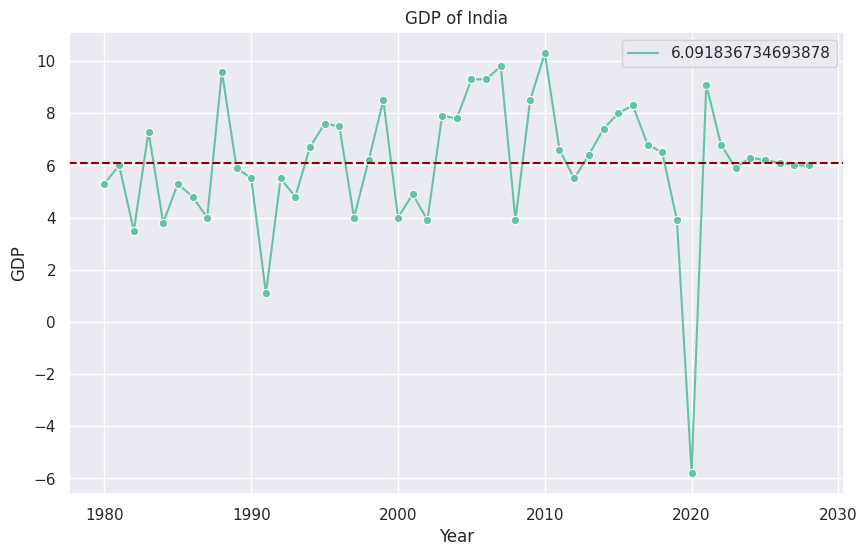

In [37]:
# Transforming the Data and Visualizing GDP of India
new_df = df.set_index('Real GDP growth (Annual percent change)')
transformed = new_df.T

plt.figure(figsize=(10, 6))
graph = sns.lineplot(x=transformed.index, y=transformed['India'], hue=transformed['India'].mean(), marker='o', palette='Set2')
graph.axhline(transformed['India'].mean(), color='darkred', linestyle='--')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP of India")
plt.legend()
plt.show()


# Unleashing the GDP Growth Story: Visualizing the Economic Trajectory

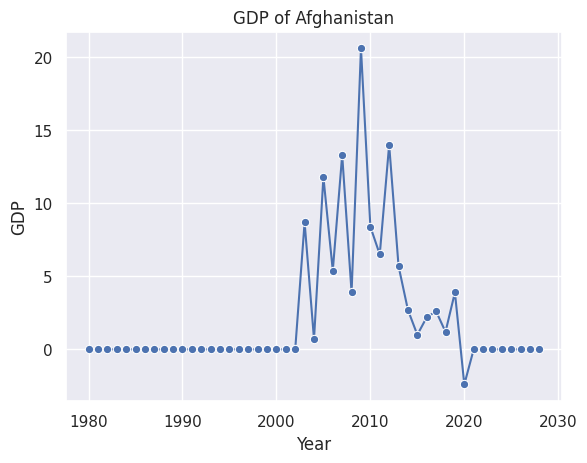

In [41]:
# Plotting GDP Growth for a Country
country_name = 'Afghanistan'
new_df = df.set_index('Real GDP growth (Annual percent change)')
transformed = new_df.T
graph = sns.lineplot(x = transformed.index, y = transformed[country_name], marker = 'o')
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title(f"GDP of {country_name}")
plt.show()


# Unveiling the Global Economic Landscape: Comparing GDP of Multiple Countries

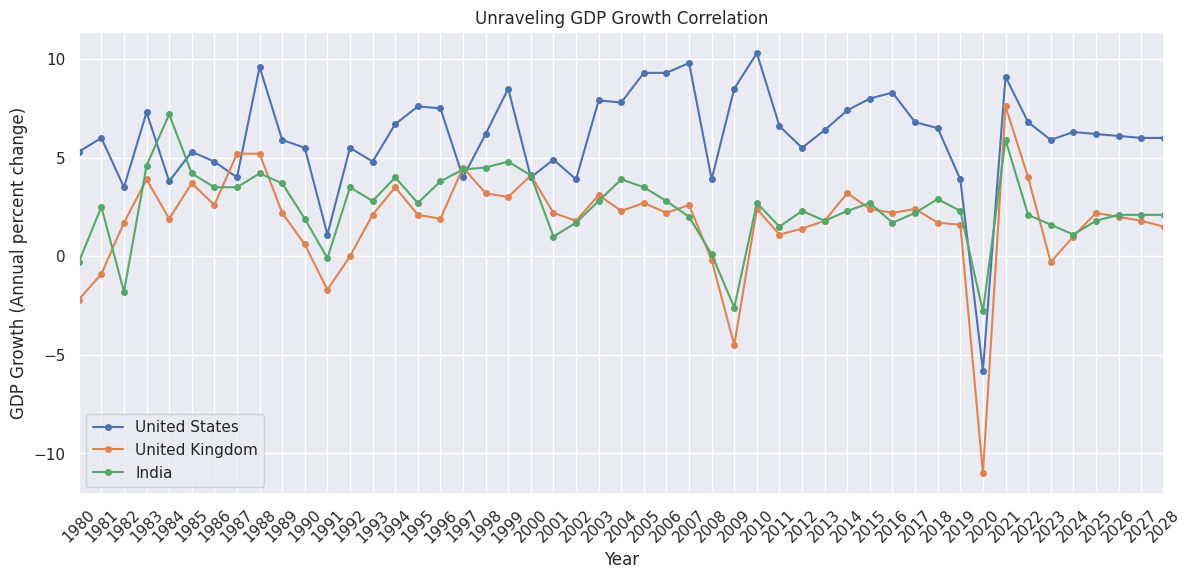

In [44]:
country_names = ['United States', 'United Kingdom', 'India']
country_data = df[df['Real GDP growth (Annual percent change)'].isin(country_names)]
country_data = country_data.replace('no data', pd.NA).dropna(axis=1)
years = country_data.columns[1:].astype(int)
gdp_growth = country_data.iloc[:, 1:].astype(float)

plt.figure(figsize=(14, 6))
for i in range(len(country_names)):
    country = country_names[i]
    growth = gdp_growth.iloc[i].values
    plt.plot(years, growth, linestyle='-', marker='o', markersize=4)

plt.grid(True)
plt.xlim(min(years), max(years))
plt.xlabel('Year')
plt.ylabel('GDP Growth (Annual percent change)')
plt.title('Unraveling GDP Growth Correlation')
plt.legend(country_names)
plt.xticks(years, rotation=45)
plt.show()

The GDP graph unveils prominent dips in growth for the United States, the United Kingdom, and India. These downturns align with two significant events: the impact of the COVID-19 pandemic in 2020 and the global recession in 2008. The COVID-19 pandemic caused a sharp decline in GDP, reflecting the widespread disruptions to economic activities. Similarly, the 2008 recession resulted in a significant downturn in GDP growth, highlighting the vulnerability of economies to financial crises. These events underscore the challenges that nations face in navigating through economic downturns and the importance of resilience in recovering from such setbacks.
